In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.21.5
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
# fog_dataset_hdf = "H:/github/python/seafog/data/collection/fog_dataset.hdf"
# fog_dataset_hdf = "F:/github/pythonScript/seafog/data/collection/fog_dataset.hdf"
fog_dataset_hdf = "F:/github/pythonScript/seafog/data/collection/extend/fog_dataset_extend.hdf"
store_dataset = pd.HDFStore(fog_dataset_hdf, mode='r')
print(store_dataset.keys())
df_train = store_dataset.get('train')
df_valid =store_dataset.get('valid')
df_test = store_dataset.get('test')
x_columns = ['v100', 'v10m', 'u100', 'u10m', 't2mm', 't2md', 'sstk','year_sin','year_cos', 'day_sin', 'day_cos',]

df_train_x = df_train.loc[:, x_columns]
df_train_y = df_train['station_vis_cat']

df_valid_x = df_valid.loc[:, x_columns]
df_valid_y = df_valid['station_vis_cat']

df_test_x = df_test.loc[:, x_columns]
df_test_y = df_test['station_vis_cat']

train_x = df_train_x.to_numpy()
train_y = df_train_y.to_numpy()

valid_x = df_valid_x.to_numpy()
valid_y = df_valid_y.to_numpy()

test_x = df_test_x.to_numpy()
test_y = df_test_y.to_numpy()

print(train_x.shape)
print(train_y.shape)


['/test', '/train', '/valid']
(63311, 11)
(63311,)


In [ ]:
valid_y

In [3]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
valid_x_scaled = scaler.fit_transform(valid_x)
test_x_scaled = scaler.fit_transform(test_x)

In [4]:
print(np.max(train_x_scaled), np.min(train_x_scaled))

6.4529692627123 -6.060409669500032


In [5]:
train_x_scaled

array([[-0.77730431, -0.78538985, -0.681154  , ..., -0.87874502,
         1.247682  , -1.22375194],
       [-0.49826761, -0.44862029, -1.40507479, ..., -0.07390625,
        -0.85802556, -1.22375194],
       [ 1.42379882,  1.29260154,  1.05573476, ..., -2.03012251,
        -0.85802556, -1.22375194],
       ...,
       [ 0.793058  ,  0.76798605,  0.15200075, ..., -1.2489984 ,
        -1.29413188, -0.22902426],
       [-1.54543334, -1.60561773, -2.33698241, ...,  0.89902726,
         1.68378831, -0.22902426],
       [-0.34942302, -0.30821825, -0.40831392, ...,  1.00111465,
         1.68378831, -0.22902426]])

In [17]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[11, ]))
for _ in range(16):
    model.add(keras.layers.Dense(20, activation="selu"))
for _ in range(4):
    model.add(keras.layers.Dense(20, activation="selu"))
    model.add(keras.layers.AlphaDropout(rate=0.5))
# AlphaDropout: 1. 均值和方差不变 2. 归一化性质也不变
# model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(3, activation="softmax"))

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[11,]),
#     keras.layers.Dense(9, activation='relu'),
#     keras.layers.Dense(6, activation='relu'),
#     keras.layers.Dense(3, activation='softmax')
# ])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 11)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_64 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_65 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_66 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_67 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_68 (Dense)             (None, 20)               

In [ ]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [20]:
# H:/github/python/seafog/
logdir = './callbacks_class_dnn_selu_dropout'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "sea_fog_classi_dnn_selu_dropout_model.h5")

model_callbacks = [
    keras.callbacks.TensorBoard(logdir),
    # keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    # keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
    ]
history = model.fit(train_x_scaled, train_y, epochs=100,
                    validation_data=(valid_x_scaled, valid_y),
                    callbacks = model_callbacks)

Epoch 1/100
1979/1979 [==============================] - 10s 5ms/step - loss: 1.3755 - accuracy: 0.3393 - val_loss: 0.9989 - val_accuracy: 0.5061
Epoch 2/100
1979/1979 [==============================] - 9s 5ms/step - loss: 1.1920 - accuracy: 0.3463 - val_loss: 0.9361 - val_accuracy: 0.5820
Epoch 3/100
1979/1979 [==============================] - 10s 5ms/step - loss: 1.1243 - accuracy: 0.3623 - val_loss: 0.9027 - val_accuracy: 0.5929c - ETA: 0s - loss: 1.1249 - accuracy
Epoch 4/100
1979/1979 [==============================] - 10s 5ms/step - loss: 1.0948 - accuracy: 0.3814 - val_loss: 0.8478 - val_accuracy: 0.6216
Epoch 5/100
1979/1979 [==============================] - 10s 5ms/step - loss: 1.0783 - accuracy: 0.4004 - val_loss: 0.8041 - val_accuracy: 0.6268
Epoch 6/100
1979/1979 [==============================] - 10s 5ms/step - loss: 1.0624 - accuracy: 0.4285 - val_loss: 0.8379 - val_accuracy: 0.6349
Epoch 7/100
1979/1979 [==============================] - 10s 5ms/step - loss: 1.0416 - a

In [21]:
type(history)

tensorflow.python.keras.callbacks.History

In [22]:
history.history

{'loss': [1.3754814863204956,
  1.1920095682144165,
  1.124302864074707,
  1.0948119163513184,
  1.0782750844955444,
  1.062425971031189,
  1.0415589809417725,
  1.0159379243850708,
  0.9832719564437866,
  0.9526811838150024,
  0.920436680316925,
  0.8931373953819275,
  0.8690491318702698,
  0.8542571067810059,
  0.8349615931510925,
  0.8238614201545715,
  0.8078868985176086,
  0.8044063448905945,
  0.7982776165008545,
  0.7853103280067444,
  0.7765822410583496,
  0.7716439366340637,
  0.7550830841064453,
  0.7222722172737122,
  0.7078585624694824,
  0.6868085265159607,
  0.6800735592842102,
  0.6712226271629333,
  0.6633493900299072,
  0.6526513695716858,
  0.6558176875114441,
  0.6780736446380615,
  0.6745997667312622,
  0.6386036276817322,
  0.6350326538085938,
  0.6270164847373962,
  0.6573178172111511,
  0.6177468299865723,
  0.6166723370552063,
  0.6191777586936951,
  0.612267255783081,
  0.6073758006095886,
  0.6586739420890808,
  0.6116282343864441,
  0.6049556732177734,
  0.59

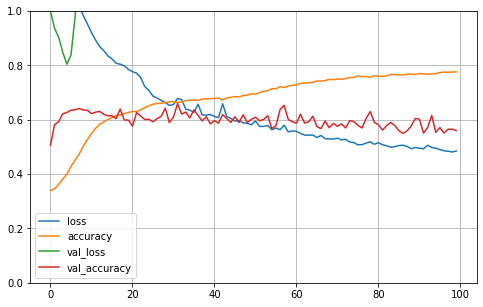

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [24]:
model.evaluate(test_x_scaled, test_y, verbose=0)

[6.2641520500183105, 0.5387760400772095]

In [25]:
predictions = model(test_x_scaled).numpy()
predictions

array([[1.0000000e+00, 1.0514388e-11, 2.4360468e-31],
       [1.0000000e+00, 1.9323728e-11, 1.9145355e-30],
       [1.0000000e+00, 1.1527661e-11, 3.3270402e-31],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.8823337e-20, 1.0000000e+00],
       [0.0000000e+00, 1.7814201e-24, 1.0000000e+00]], dtype=float32)

In [26]:
p_test = tf.nn.softmax(predictions).numpy()



In [27]:
p_test[:,0]

array([0.5761169 , 0.5761169 , 0.5761169 , ..., 0.21194156, 0.21194156,
       0.21194156], dtype=float32)

In [28]:
df_p_test = pd.DataFrame({'p_fog':p_test[:,0],'p_mist':p_test[:,1],'p_clear':p_test[:,2]})

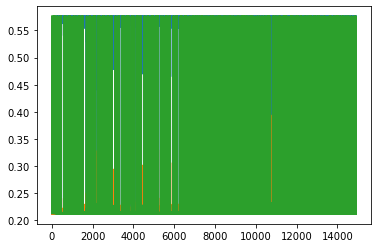

In [29]:
df_p_test['p_clear'].plot()
df_p_test['p_mist'].plot()
df_p_test['p_fog'].plot()

In [ ]:

df_test_result = df_test.join(df_p_test) 
print(df_test_result.head())
df_test_result.to_csv('df_test_result.csv')

In [ ]:
# 各类别预测准确性对比
# 筛选出不同类别 df_all.loc[df_all['station_vis_cat'] == 2]
# 计算输出的类别 